MSE for Fine Tuned Model is less than the pretrained FLOWNETS architure, LUCAS KANADE and BLOCK Matching Output

For Fine Tuned FLOWNETS Model MSE is 48.580154

For Pretrained FLOWNETS Model MSE is 58.289524

For Block Matching Technique MSE is 56.629194273541714.

For LUCAS KANADE Technique MSE is 70.11436223973823

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import os

#TASK 1

#Cloning the Repository

In [ ]:
!git clone https://github.com/ClementPinard/FlowNetPytorch.git

fatal: destination path 'FlowNetPytorch' already exists and is not an empty directory.


In [33]:
%cd FlowNetPytorch/

/content/FlowNetPytorch


#Getting outputs for the flying chair dataset

In [34]:
!python3 run_inference.py /content/ /content/drive/MyDrive/pytorch/flownets_EPE1.951.pth

=> will save raw output and RGB visualization
=> fetching img pairs in '/content/'
=> will save everything to /content/flow
13 samples found
=> using pre-trained model 'flownets'
  0% 0/13 [00:00<?, ?it/s]/content/FlowNetPytorch/run_inference.py:91: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = input_transform(imread(img1_file))
/content/FlowNetPytorch/run_inference.py:92: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = input_transform(imread(img2_file))
100% 13/13 [00:07<00:00,  1.75it/s]


#Output using Lucas kanade

In [ ]:
def pad(img,k):
  img=np.insert(img,img.shape[0],img[img.shape[0]-1,:],axis=0)
  img=np.insert(img,img.shape[1],img[:,img.shape[1]-1],axis=1)
  for i in range(k//2):
      img=np.insert(img,img.shape[0],img[img.shape[0]-1,:],axis=0)
      img=np.insert(img,img.shape[1],img[:,img.shape[1]-1],axis=1)
      img=np.insert(img,0,img[0,:],axis=0)
      img=np.insert(img,0,img[:,0],axis=1)
  return img

In [ ]:
def LN(str1,str2,str3):
  gt=np.load(str3)
  img_1=cv2.cvtColor(cv2.imread(str1),cv2.COLOR_BGR2GRAY).astype(np.float32)
  img_2=cv2.cvtColor(cv2.imread(str2),cv2.COLOR_BGR2GRAY).astype(np.float32)
  w=3
  for kernel in [5]:
      img1=pad(img_1,kernel)
      img2=pad(img_2,kernel)
      r,c=img1.shape
      I_x=np.zeros((r-1,c-1))
      I_y=np.zeros((r-1,c-1))
      I_t=np.zeros((r-1,c-1))
      for i in range(r-1):
        for j in range(c-1):
          I_x[i,j]=0.25*(img1[i+1,j]+img2[i+1,j]+img1[i+1,j+1]+img2[i+1,j+1]-(img1[i,j]+img2[i,j]+img1[i,j+1]+img2[i,j+1]))
          I_y[i,j]=0.25*(img1[i,j+1]+img2[i,j+1]+img1[i+1,j+1]+img2[i+1,j+1]-(img1[i,j]+img2[i,j]+img1[i+1,j]+img2[i+1,j]))
          I_t[i,j]=0.25*(img2[i,j+1]+img2[i+1,j+1]+img2[i+1,j]+img2[i,j]-(img1[i,j+1]+img1[i+1,j+1]+img1[i+1,j]+img1[i,j]))
      optical_flow=np.zeros((r-kernel,c-kernel))
      r,c=optical_flow.shape
      for i in range(kernel//2,r+kernel//2):
        for j in range(kernel//2,c+kernel//2):
          A=np.zeros((kernel*kernel,2))
          b=np.zeros((kernel*kernel,1))
          l=0
          for m in range(i-kernel//2,i+kernel//2+1):
            for n in range(j-kernel//2,j+kernel//2+1):
              A[l][0]=I_x[m,n]
              A[l][1]=I_y[m,n]
              b[l][0]=-I_t[m,n]
              l+=1
          h=(A.T@A)
          if (np.linalg.det(h)!=0):
            u=(np.linalg.inv(h)@A.T@b)
          else :
            u=np.array([[0],[0]])
          optical_flow[i-kernel//2,j-kernel//2]=((u[1,0])**2 + (u[0,0])**2 )**0.5
      w+=1
      MSE =np.square(optical_flow-gt).mean()
      print(f' For patch size = {kernel} X {kernel}, MSE = {MSE}.')

In [ ]:
LN("/content/img1.jpg","/content/img2.jpg","/content/GT1.npy")

 For patch size = 5 X 5, MSE = 70.11436223973823.


#MSE for Pretrained FLOWNETS architechture

In [ ]:
import numpy as np

# Load the .npy file into a numpy array
gt = np.load('/content/GT1.npy')

import cv2

# Load the image
image = cv2.imread('/content/flow/imgflow.png')

# Resize the image to 96x128
resized_image = cv2.resize(image, (512, 384))
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

In [ ]:
gray_image = 255 - gray_image

In [ ]:
MSE =np.square(gray_image-gt).mean()

In [ ]:
print(MSE)

58.289524


#######MSE for FLOWNET Architecture(Deep Learning Based methods) is Less as compared to that in LUCAS KANADE Estimation############

In [ ]:
#############################################################################################################################################################

#TASK 2

#Getting ground truth for collected dataset using RAFT model

In [ ]:
from torchvision.utils import save_image

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import torchvision.transforms as T


plt.rcParams["savefig.bbox"] = "tight"
# sphinx_gallery_thumbnail_number = 2


def plot(imgs, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0])
    _, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            img = F.to_pil_image(img.to("cpu"))
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    plt.tight_layout()

In [ ]:
video_path = '/content/IMG_1203.MOV'

In [ ]:
!pip install av

In [ ]:
get_ipython().system('pip install PyAV')

In [ ]:
import av

In [ ]:
from torchvision.io import read_video
video_path = '/content/drive/MyDrive/checkpoint/Dataset /IMG_1208.MOV'
frames, _, _ = read_video(video_path)
frames = frames.permute(0, 3, 1, 2)  # (N, H, W, C) -> (N, C, H, W)

In [ ]:
frames.shape

torch.Size([135, 3, 1080, 1920])

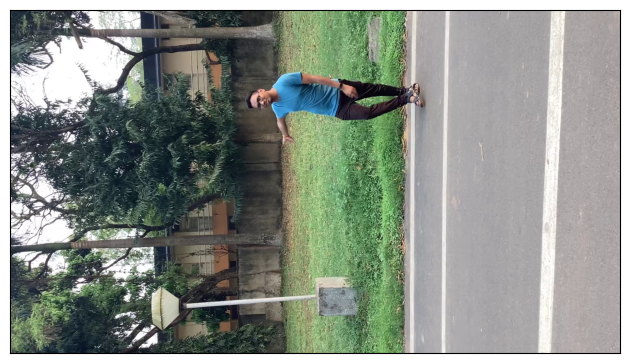

In [ ]:
img1_batch = torch.stack([frames[1]])
img2_batch = torch.stack([frames[50]])

plot(img1_batch)

In [ ]:
def preprocess(batch):
    transforms = T.Compose(
        [
            T.ConvertImageDtype(torch.float32),
            T.Normalize(mean=0.5, std=0.5),
            T.Resize(size=(520, 960)),
        ]
    )
    batch = transforms(batch)
    return batch

In [ ]:
from torchvision.models.optical_flow import raft_large

model = raft_large(pretrained=True, progress=False)
model = model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Raft_Large_Weights.C_T_SKHT_V2`. You can also use `weights=Raft_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
from torchvision.utils import flow_to_image

In [ ]:
def process_video(video_path,save_dir):
  frames,_,_=read_video(video_path)
  frames = frames.permute(0, 3, 1, 2)
  j=29
  for i in range(0,len(frames)-5,8):
    img1_batch=torch.stack([frames[i]])
    img2_batch=torch.stack([frames[i+4]])
    img1_batch = preprocess(img1_batch)
    img2_batch = preprocess(img2_batch)
    list_of_flows = model(img1_batch,img2_batch)
    predicted_flows = list_of_flows[-1]
    flow_imgs = flow_to_image(predicted_flows)
    img1_batch = [(img1 + 1) / 2 for img1 in img1_batch]
    imgpath1='Target_frame/'+str({j+1})+'.png'
    imgpath2='Ref_frame/'+str({j+1})+'.png'
    gtpath='flow/'+str({j+1})+'.png'
    j+=1
    save_image(img1_batch[0],os.path.join(save_dir,imgpath1))
    save_image(img2_batch[0],os.path.join(save_dir,imgpath2))
    save_image(predicted_flows,os.path.join(save_dir,gtpath))
    del img1_batch,img2_batch,list_of_flows,predicted_flows,flow_imgs

In [ ]:
save_dir='/content/drive/MyDrive/dataset_flow/'

In [ ]:
video_path = '/content/drive/MyDrive/checkpoint/Dataset /IMG_1225.MOV'
frames, _, _ = read_video(video_path)
frames = frames.permute(0, 3, 1, 2)  # (N, H, W, C) -> (N, C, H, W)

/usr/local/lib/python3.10/dist-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


In [ ]:
frames.shape

torch.Size([73, 3, 1080, 1920])

In [ ]:
process_video(video_path,save_dir)

In [ ]:
%cd FlowNetPytorch/

/content/FlowNetPytorch


In [ ]:
%cd /content/drive/MyDrive/flow/FlowNetPytorch-master

/content/drive/MyDrive/flow/FlowNetPytorch-master


#Converting .png target and reference images into .ppm format and optical flow into .flo format

In [ ]:
import cv2

def convert_png_to_ppm(png_path, ppm_path):
    # Read PNG image using OpenCV
    png_image = cv2.imread(png_path)

    # Convert PNG image to PPM format
    ppm_image = cv2.cvtColor(png_image, cv2.COLOR_BGR2RGB)

    # Save the converted image as PPM
    cv2.imwrite(ppm_path, ppm_image)




######Converting .png reference images into .ppm format

In [ ]:
for i in range(1,39):
  png_file = "/content/drive/MyDrive/dataset_flow/Ref_frame/{"+str(i)+"}.png"
  ppm_file = "/content/drive/MyDrive/new_data/{"+str(i)+"}_img1.ppm"
  convert_png_to_ppm(png_file, ppm_file)


######Converting .png target images into .ppm format

In [ ]:
for i in range(1,39):
  png_file = "/content/drive/MyDrive/dataset_flow/Target_frame/{"+str(i)+"}.png"
  ppm_file = "/content/drive/MyDrive/new_data/{"+str(i)+"}_img2.ppm"
  convert_png_to_ppm(png_file, ppm_file)

######Converting .png optical flow images into .flo format

In [ ]:
import struct
def write_flow(filename, uv):
    """
    Write optical flow to file.

    :param filename: target filename
    :param uv: optical flow map
    """
    with open(filename, 'wb') as f:
        f.write(bytearray(struct.pack('f', 202021.25)))
        f.write(bytearray(struct.pack('i', uv.shape[1])))
        f.write(bytearray(struct.pack('i', uv.shape[0])))
        np.array(uv).tofile(f)
import cv2
import numpy as np
import os

def convert_png_to_flo(png_path, flo_path):
    # Read PNG image using OpenCV
    png_image = cv2.imread(png_path)

    # Assuming the PNG image represents the optical flow in some format
    # You may need to preprocess the PNG image to obtain the optical flow
    # For example, converting it to a numpy array

    # Convert PNG image to numpy array and preprocess if necessary
    uv = preprocess_png_to_flow(png_image)  # Replace this with your preprocessing logic

    # Write optical flow to .flo file
    write_flow(flo_path, uv)

# Example preprocessing function
def preprocess_png_to_flow(png_image):
    # Example: Convert BGR to RGB and normalize pixel values to the range [-1, 1]
    rgb_image = cv2.cvtColor(png_image, cv2.COLOR_BGR2RGB)
    uv = rgb_image.astype(np.float32) / 255.0
    uv = (uv - 0.5) * 2.0  # Normalize to the range [-1, 1]
    return uv

# Convert all PNG files from one directory to .flo files in another directory
for i in range(1,39):
  png_file = "/content/drive/MyDrive/dataset_flow/flow/{"+str(i)+"}.png"
  ppm_file = "/content/drive/MyDrive/new_data/{"+str(i)+"}_flow.flo"
  convert_png_to_flo(png_file, ppm_file)


In [ ]:
import numpy as np
import os
import struct

def write_flow(filename, uv):
    """
    Write optical flow to file.

    :param filename: target filename
    :param uv: optical flow map
    """
    with open(filename, 'wb') as f:
        f.write(struct.pack('f', 202021.25))
        f.write(struct.pack('i', uv.shape[1]))
        f.write(struct.pack('i', uv.shape[0]))
        uv.flatten().astype(np.float32).tofile(f)

def convert_png_to_flo(png_path, flo_path):
    # Read PNG image using OpenCV
    png_image = cv2.imread(png_path)
    # Convert PNG image to numpy array and preprocess if necessary
    uv = preprocess_png_to_flow(png_image)  # Replace this with your preprocessing logic
    # Write optical flow to .flo file
    write_flow(flo_path, uv)

# Example preprocessing function
def preprocess_png_to_flow(png_image):
    # Example: Convert BGR to RGB and normalize pixel values to the range [-1, 1]
    rgb_image = cv2.cvtColor(png_image, cv2.COLOR_BGR2RGB)
    uv = rgb_image.astype(np.float32) / 255.0
    uv = (uv - 0.5) * 2.0  # Normalize to the range [-1, 1]
    return uv

# Convert all PNG files from one directory to .flo files in another directory
for i in range(1, 39):
    png_file = f"/content/drive/MyDrive/dataset_flow/flow/{i}.png"
    flo_file = f"/content/drive/MyDrive/new_data/{i}_flow.flo"
    convert_png_to_flo(png_file, flo_file)


###Fine Tuning of Model on manual Dataset

In [1]:
!git clone https://github.com/ClementPinard/FlowNetPytorch

Cloning into 'FlowNetPytorch'...
remote: Enumerating objects: 529, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 529 (delta 7), reused 13 (delta 7), pack-reused 512
Receiving objects: 100% (529/529), 1.21 MiB | 9.13 MiB/s, done.
Resolving deltas: 100% (303/303), done.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content

/content


In [3]:
%cd FlowNetPytorch/

/content/FlowNetPytorch


In [5]:
!pip install -r requirements.txt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-

In [ ]:
!python main.py /content/drive/MyDrive/new_data --pretrained /content/drive/MyDrive/pytorch/flownets_EPE1.951.pth --epochs 20 --lr 0.00005 -b2 -j2 -a flownets

In [8]:
!python main.py /content/drive/MyDrive/new_data --pretrained /content/drive/MyDrive/checkpoints/flownets_EPE1.951.pth --epochs 10 --lr 0.00001 -b8 -j2 -a flownets

2024-03-23 13:36:18.724903: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 13:36:18.724958: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 13:36:18.726319: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-23 13:36:20.002806: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
=> will save everything to flying_chairs/03-23-13:36/flownets,adam,10epochs,epochSize1000,b8,lr1e-05
=> fetching img pairs in '/content/drive/MyDrive/new_data'
38 samples found, 31 train samples and 7 test samples 
=> using pre-trained model

In [12]:
!python3 run_inference.py /content/ /content/FlowNetPytorch/flying_chairs/03-23-13:33/flownets,adam,10epochs,epochSize1000,b2,lr1e-05/model_best.pth.tar

=> will save raw output and RGB visualization
=> fetching img pairs in '/content/'
=> will save everything to /content/flow
2 samples found
=> using pre-trained model 'flownets'
  0% 0/2 [00:00<?, ?it/s]/content/FlowNetPytorch/run_inference.py:91: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = input_transform(imread(img1_file))
/content/FlowNetPytorch/run_inference.py:92: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = input_transform(imread(img2_file))
100% 2/2 [00:07<00:00,  3.55s/it]


#Comparing output with Lucas Kanade and Block Matching Techniques


In [16]:
import cv2

##### Calculating MSE using Fine Tuned Model

In [18]:
import numpy as np

# Load the .npy file into a numpy array
gt = np.load('/content/GT1.npy')

image = cv2.imread('/content/flow/imgflow.png')

# Resize the image to 96x128
resized_image = cv2.resize(image, (512, 384))
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

In [19]:
gray_image = 255 - gray_image

In [20]:
MSE =np.square(gray_image-gt).mean()

In [ ]:
print(MSE)

48.580154


##### Calculating MSE using Block Matching

In [25]:
%cd /content

/content


In [22]:
def pad2(img,k):
  for i in range(k):
      img=np.insert(img,img.shape[0],np.zeros((1,img.shape[1])),axis=0)
      img=np.insert(img,img.shape[1],np.zeros((img.shape[0],1)).reshape((img.shape[0],)),axis=1)
      img=np.insert(img,0,np.zeros((1,img.shape[1])),axis=0)
      img=np.insert(img,0,np.zeros((img.shape[0],1)).reshape((img.shape[0],)),axis=1)
  return img
def h_match(b,a):
    r,c=b.shape
    l,k=a.shape
    l=l//2
    k=k//2
    r=r//2
    c=c//2
    loss=np.square(a[0:2*r+1,0:2*c+1]-b).sum()
    m,n=r,c
    f=((m-l)**2+(n-k)**2)**0.5
    for i in range(r,a.shape[0]-r):
      for j in range(c,a.shape[1]-c):
        loss1=np.square(a[i-r:i+r+1,j-c:j+c+1]-b).mean()
        if(loss1<=loss):
          loss=loss1
          if (((i-l)**2+(j-k)**2)**0.5)<f:
            m,n=i,j
            f=((m-l)**2+(n-k)**2)**0.5
    return f

In [23]:
def H_search(str1,str2,str3,blocksize=5,window=8):
  pad=window+blocksize//2
  img_1=cv2.cvtColor(cv2.imread(str1),cv2.COLOR_BGR2GRAY).astype(np.float32)
  img_2=cv2.cvtColor(cv2.imread(str2),cv2.COLOR_BGR2GRAY).astype(np.float32)
  gt=np.load(str3)
  plt.subplot(1, 4, 1)
  plt.imshow(img_1, cmap = 'gray')
  plt.subplot(1, 4, 2)
  plt.imshow(img_2, cmap = 'gray')
  plt.subplot(1, 4, 3)
  plt.imshow(gt, cmap = 'gray')
  flow=np.zeros(img_1.shape)
  img1=pad2(img_1,blocksize//2)
  img2=pad2(img_2,pad)
  r,c=img1.shape
  j=3
  for i in range (blocksize//2,r-blocksize//2):
    for j in range (blocksize//2,c-blocksize//2):
      flow[i-blocksize//2,j-blocksize//2]=h_match(img1[i-blocksize//2:i+1+blocksize//2,j-blocksize//2:j+1+blocksize//2],img2[i+window-pad:i+window+1+pad,j+window-pad:j+window+1+pad])
  plt.subplot(1, 4, 4)
  plt.imshow(flow, cmap = 'gray')
  MSE = np.square(flow-gt).mean()
  print(f' For window size , MSE = {MSE}.')
  return flow

 For window size , MSE = 56.629194273541714.


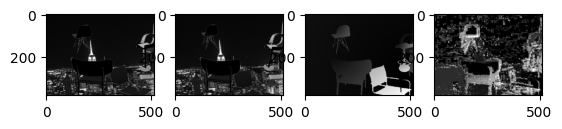

In [28]:
flow=H_search('img1.jpg','img2.jpg','GT1.npy')

MSE for Fine Tuned Model is less than the FLOWNETS,LUCAS KANADE and BLOCK Matching Output.
For Fine Tuned FLOWNETS Model MSE is 48.580154.
For Pretrained FLOWNETS Model MSE is 58.289524.
For Block Matching Technique MSE is 56.629194273541714.
For LUCAS KANADE MSE is 48.580154